# Skin segmentation 

In this assignement you will train classifier to assign colors to skin or no skin classes. The data is taken from [Skin Segmentation Data Set](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation#) in the UCI Machine Learning repository.

The  data is in a plain text format and contains four columns. First three contain RGB color data  represented as integers in the range 0-255, and the last column is an integer label  with 1 representing skin and 2 representing no skin. This file we can load directly into a numpy array:

In [64]:
import numpy as np

In [65]:
data = np.loadtxt('Skin_NonSkin.txt')

In [66]:
rgb  = data[:,:3]
lbl = data[:,3].astype('int32') # some function expect labels to be integers

In [67]:
import pandas as pd

df1 = pd.DataFrame({'r': rgb[:,0], 'g' : rgb[:,1], 'b' : rgb[:,2],'label': lbl})

In [68]:
df1.head()

,r,g,b,label
0,74.0,85.0,123.0,1
1,73.0,84.0,122.0,1
2,72.0,83.0,121.0,1
3,70.0,81.0,119.0,1
4,70.0,81.0,119.0,1


We see that the classes are not balanced:

In [69]:
np.bincount(lbl)

array([     0,  50859, 194198], dtype=int64)

lbl=0 is nonexistent

## Problem 1 

Compare the performance of the QuadraticDiscriminantAnalysis, LinearDiscriminativeAnalysis and NaiveBayes classifiers on this set. Use the `sklearn` library when needed. Compare the confusion matrices (tpr, fpr, tnr, fnr), precision and f1_ score and auc_score, as well ROC curves. Prepare a summary table with all the numerical scores one row per classifier on one column per metric (use pandas.DataFame). Plot all  ROC curves on the same plot and label them accordingly. Assume that skin is positive and non-skin negative. 

First of all, we will import the sklearn library and the required functions:

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve



We split the dataset into train set and test set:

In [71]:
train_data, test_data, train_labels, test_labels = train_test_split(rgb, lbl, test_size=0.2)

Now we fit, predict, and calculate the scores (we add the line directly into the DataFrame, except in the case of confusion matrix).

In [72]:
import pandas as pd
def analize(cls, name, train_data, train_labels, test_data, test_labels):
    classifier = cls
    classifier.fit(train_data,train_labels)
    test_predicted = classifier.predict(test_data)
    test_pred_prob= classifier.predict_proba(test_data) #remember that this gives two columns
    fprs, tprs, thds  = roc_curve(test_labels, test_pred_prob[:,0],pos_label = 1)  
    tnr, fpr, fnr, tpr = confusion_matrix(test_labels, test_predicted,normalize='pred').ravel()
    auc = roc_auc_score(test_labels, test_pred_prob[:,1])
    return  pd.DataFrame({'TNR':[tnr],
                          'FNR':[fpr],
                          'FPR':[fnr],
                          'TPR':[tpr],
                          'Precision' : [precision_score(test_labels, test_predicted, average='macro')],
                          'F1' :[f1_score(test_labels, test_predicted, average='macro')],
                          'AUC' :[auc]
                           }, index=[name]), fprs, tprs, thds, auc

And now we run our function for the three different classifiers, which are previously stored in a list along with their names, which
will appear as index. In order to have a single DataFrame, we use the function pd.concat().

Apart from this, we are asked to plot all the ROC curves together, so every time the for loop runs, we will use plt.plot for the given classifier:

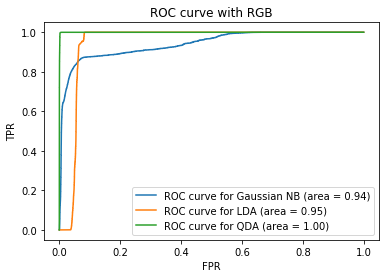

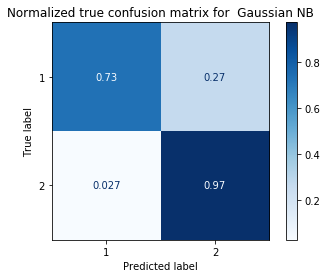

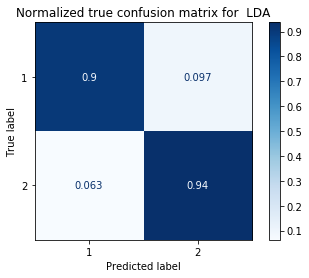

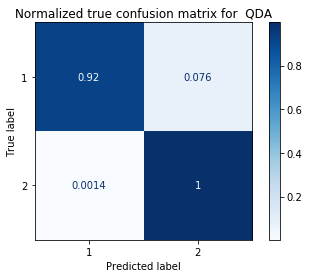

In [73]:
import matplotlib.pyplot as plt

classifiers = [['Gaussian NB', 'LDA','QDA'],[ GaussianNB(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]]
df_score = pd.DataFrame()

for i in range(len(classifiers[1])):
    df,fprs,tprs,thds,auc = analize(classifiers[1][i], classifiers[0][i] , train_data, train_labels, test_data, test_labels)
    df_score = pd.concat([df_score,df])
    plt.plot(fprs,tprs,label= "ROC curve for %s" %classifiers[0][i] + " (area = %0.2f)" %float(auc))
    plt.legend()
    plt.title("ROC curve with RGB")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
plt.show()

for i in range(len(classifiers[1])):
    confusion_plot_normalized = plot_confusion_matrix(classifiers[1][i], test_data, test_labels,cmap=plt.cm.Blues, normalize='true')
    plt.title("Normalized true confusion matrix for  %s" %classifiers[0][i])
    plt.show()

Final DataFrame:

In [74]:
df_score.head()

,TNR,FNR,FPR,TPR,Precision,F1,AUC
Gaussian NB,0.876633,0.066589,0.123367,0.933411,0.905022,0.875923,0.940655
LDA,0.788776,0.026234,0.211224,0.973766,0.881271,0.898560,0.945277
QDA,0.994064,0.019379,0.005936,0.980621,0.987342,0.973737,0.999650


## Problem 2

Repeat same analysis but with RGB  data converted to Hue  Saturation Value (HSV) format. You can use the `colorsys` module for conversion 

In [75]:
from colorsys import rgb_to_hsv
hsv = np.asarray([rgb_to_hsv(*row) for row in rgb]) #inneficient but it does not matter

So we only have to update the variables:

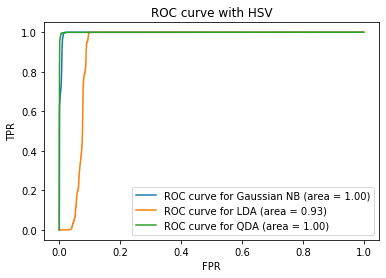

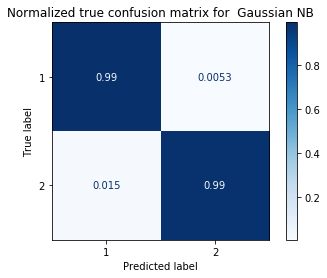

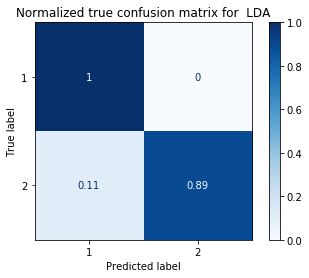

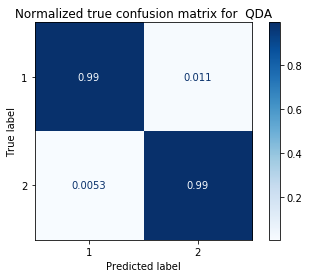

In [76]:
train_data_2, test_data_2, train_labels_2, test_labels_2 = train_test_split(hsv, lbl, test_size=0.2)


df_score_2 = pd.DataFrame()




for i in range(len(classifiers[1])):
    df_2,fprs_2,tprs_2,thds_2,auc_2 = analize(classifiers[1][i], classifiers[0][i] , train_data_2, train_labels_2, test_data_2, test_labels_2)
    df_score_2 = pd.concat([df_score_2,df_2])
    plt.plot(fprs_2,tprs_2,label= "ROC curve for %s" %classifiers[0][i] + " (area = %0.2f)" %float(auc_2))
    plt.legend()
    plt.title("ROC curve with HSV")
    plt.xlabel("FPR")
    plt.ylabel("TPR")

plt.show()



for i in range(len(classifiers[1])):
    confusion_plot_normalized = plot_confusion_matrix(classifiers[1][i], test_data_2, test_labels_2,cmap=plt.cm.Blues, normalize='true')
    plt.title("Normalized true confusion matrix for  %s" %classifiers[0][i])
    plt.show()

And we see that the results are even better.

In [77]:
df_score_2.head()

,TNR,FNR,FPR,TPR,Precision,F1,AUC
Gaussian NB,0.944013,0.001348,0.055987,0.998652,0.971333,0.980265,0.997151
LDA,0.700517,0.000000,0.299483,1.000000,0.850258,0.883346,0.927310
QDA,0.979386,0.002870,0.020614,0.997130,0.988258,0.989972,0.999442
